In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# importing dataset 
df = pd.read_csv('D:/2024_ML/DL/Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# split independent and dependent features
X = df.iloc[:,3:13]
y = df.iloc[:,-1]

In [4]:
# dummies for geography
geography = pd.get_dummies(df[['Geography']],drop_first=True)
gender = pd.get_dummies(df[['Gender']],drop_first=True)

In [5]:
# concat dataframes
X = pd.concat([X,geography,gender], axis=1)

In [6]:
# drop geography and gender
X = X.drop(columns=['Geography','Gender'],axis=1)

In [7]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
# standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU

In [10]:
# ANN
classifier = Sequential()
classifier.add(Dense(units=6, activation="relu", kernel_initializer='he_normal',input_dim=11))
classifier.add(Dense(units=6, activation="relu", kernel_initializer='he_normal'))
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_normal'))
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# fitting ANN to training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.5746 - accuracy: 0.7477 - val_loss: 0.5071 - val_accuracy: 0.7925
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4964 - accuracy: 0.7983 - val_loss: 0.4912 - val_accuracy: 0.7948
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4828 - accuracy: 0.8000 - val_loss: 0.4823 - val_accuracy: 0.7959
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4731 - accuracy: 0.8003 - val_loss: 0.4753 - val_accuracy: 0.7986
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4645 - accuracy: 0.8009 - val_loss: 0.4689 - val_accuracy: 0.7978
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4568 - accuracy: 0.8018 - val_loss: 0.4631 - val_accuracy: 0.7989
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4509 - accuracy: 0.8041 - val_loss: 0.4586 - val_accuracy: 0.7989

In [12]:
# lsit all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


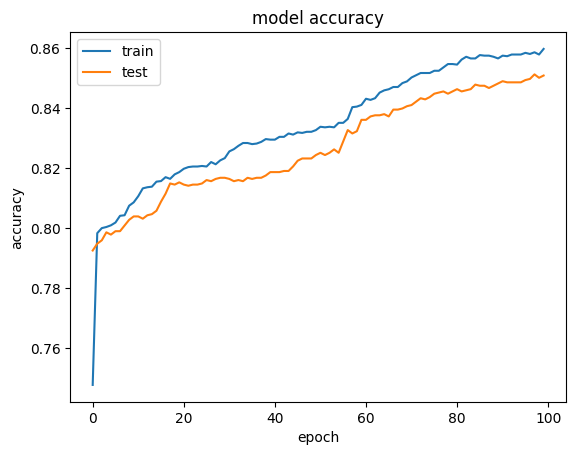

In [17]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [18]:
# predicting for test set
ypred = classifier.predict(X_test)
ypred = (ypred > 0.5)

63/63 [==============================] - 4s 1ms/step


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)

# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.849